In [2]:
import pickle
import pandas as pd

with open('german-traffic-signs/train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
    val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
    test_data = pickle.load(f)

signnames = pd.read_csv('german-traffic-signs/signnames.csv')
print(len(signnames))
print(type(train_data))
print(train_data.keys())


43
<class 'dict'>
dict_keys(['coords', 'labels', 'features', 'sizes'])


In [3]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

print('Training data:', X_train.shape)
print('Validation data:', X_val.shape)
print('Test data:', X_test.shape)


Training data: (34799, 32, 32, 3)
Validation data: (4410, 32, 32, 3)
Test data: (12630, 32, 32, 3)


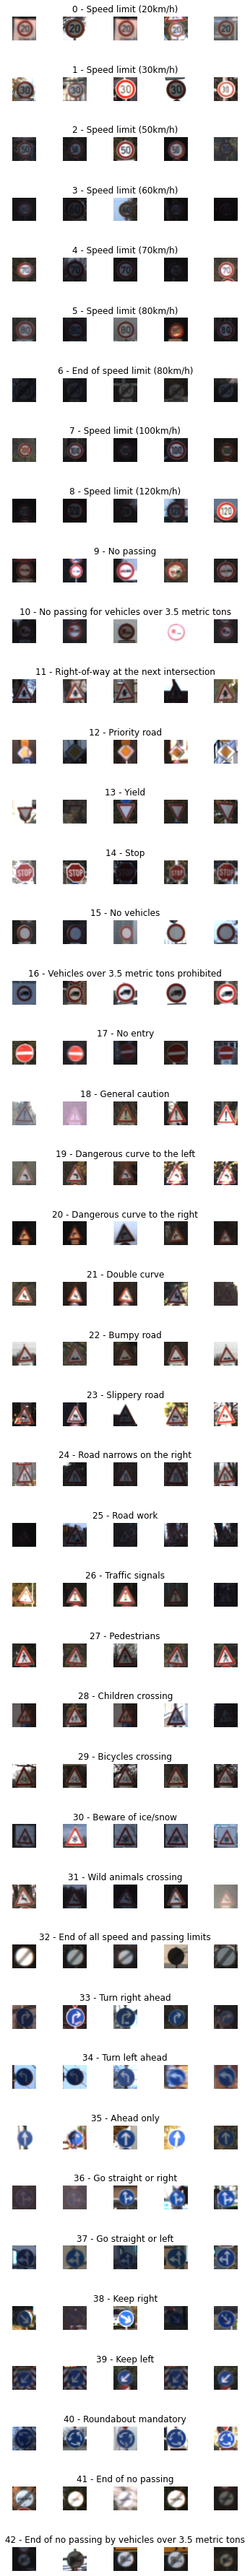

In [4]:
import matplotlib.pyplot as plt
import random
%matplotlib inline


num_of_samples = []
cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 50))
fig.tight_layout()

for i in range(cols):
    for j, row in signnames.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, (len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + " - " + row["SignName"])
            num_of_samples.append(len(x_selected))


[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


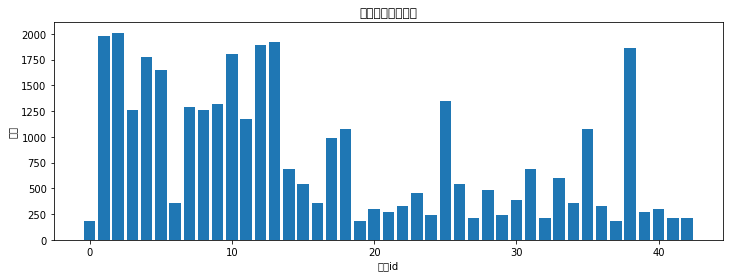

In [6]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("各分类图片的分布")
plt.xlabel("类别id")
plt.ylabel("数量")
plt.show()


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam


def leNet_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(150, activation='relu'))
    model.add(Dense(43, activation='softmax'))
    
    model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = leNet_model()
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 30)        2280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 540)               0         
_________________________________________________________________
dense (Dense)                (None, 150)               81150     
_________________________________________________________________
dense_1 (Dense)              (None, 43)                6

D:\Anaconda\envs\tensorflow-gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)


In [9]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=400, verbose=1, shuffle=True)


Epoch 1/20
87/87 [==============================] - 7s 15ms/step - loss: 6.9628 - accuracy: 0.2319 - val_loss: 2.2071 - val_accuracy: 0.4626
Epoch 2/20
87/87 [==============================] - 1s 11ms/step - loss: 1.2271 - accuracy: 0.6773 - val_loss: 1.3883 - val_accuracy: 0.6773
Epoch 3/20
87/87 [==============================] - 1s 11ms/step - loss: 0.7013 - accuracy: 0.8117 - val_loss: 1.1537 - val_accuracy: 0.7240
Epoch 4/20
87/87 [==============================] - 1s 11ms/step - loss: 0.5122 - accuracy: 0.8626 - val_loss: 1.1744 - val_accuracy: 0.7460
Epoch 5/20
87/87 [==============================] - 1s 11ms/step - loss: 0.4092 - accuracy: 0.8876 - val_loss: 1.0927 - val_accuracy: 0.7642
Epoch 6/20
87/87 [==============================] - 1s 11ms/step - loss: 0.3206 - accuracy: 0.9126 - val_loss: 1.1476 - val_accuracy: 0.7594
Epoch 7/20
87/87 [==============================] - 1s 11ms/step - loss: 0.2644 - accuracy: 0.9274 - val_loss: 0.9391 - val_accuracy: 0.8034
Epoch 8/20
87

In [10]:
def evaluate():
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test Accuracy:', score[1])

evaluate()


Test score: 1.5910340547561646
Test Accuracy: 0.8304038047790527


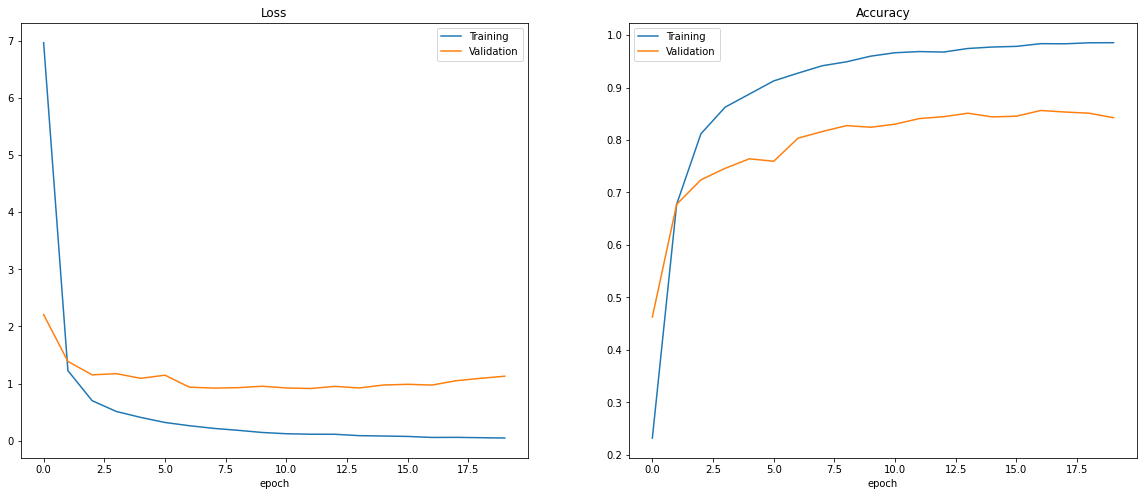

In [11]:
def plot_history(history):
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    axs[0].plot(history.history['loss'])
    axs[0].plot(history.history['val_loss'])
    axs[0].legend(['Training', 'Validation'])
    axs[0].set_title('Loss')
    axs[0].set_xlabel('epoch')
    
    axs[1].plot(history.history['accuracy'])
    axs[1].plot(history.history['val_accuracy'])
    axs[1].legend(['Training', 'Validation'])
    axs[1].set_title('Accuracy')
    axs[1].set_xlabel('epoch')

plot_history(history)


In [12]:
def modified_model():
   model = Sequential()
   model.add(Conv2D(30, (5, 5), input_shape=(32, 32, 3), activation='relu'))
   model.add(MaxPooling2D(pool_size=(2, 2)))

   model.add(Conv2D(15, (3, 3), activation='relu'))
   model.add(MaxPooling2D(pool_size=(2, 2)))
   model.add(Dropout(0.5))
   
   model.add(Flatten())
   model.add(Dense(150, activation='relu'))
   model.add(Dropout(0.7))
   model.add(Dense(43, activation='softmax'))
   
   model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
   return model

model = modified_model()
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 30)        2280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)              

In [13]:
model = modified_model()
history = model.fit(X_train, y_train, epochs=60, validation_data=(X_val, y_val), batch_size=400, verbose=1, shuffle=True)


Epoch 1/60
87/87 [==============================] - 1s 13ms/step - loss: 5.1311 - accuracy: 0.0503 - val_loss: 3.7116 - val_accuracy: 0.0476
Epoch 2/60
87/87 [==============================] - 1s 11ms/step - loss: 3.6758 - accuracy: 0.0514 - val_loss: 3.6611 - val_accuracy: 0.0476
Epoch 3/60
87/87 [==============================] - 1s 11ms/step - loss: 3.6157 - accuracy: 0.0508 - val_loss: 3.6081 - val_accuracy: 0.0476
Epoch 4/60
87/87 [==============================] - 1s 11ms/step - loss: 3.5592 - accuracy: 0.0530 - val_loss: 3.5675 - val_accuracy: 0.0476
Epoch 5/60
87/87 [==============================] - 1s 11ms/step - loss: 3.5254 - accuracy: 0.0542 - val_loss: 3.5520 - val_accuracy: 0.0476
Epoch 6/60
87/87 [==============================] - 1s 11ms/step - loss: 3.5136 - accuracy: 0.0537 - val_loss: 3.5489 - val_accuracy: 0.0476
Epoch 7/60
87/87 [==============================] - 1s 11ms/step - loss: 3.5066 - accuracy: 0.0539 - val_loss: 3.5484 - val_accuracy: 0.0544
Epoch 8/60
87

Epoch 59/60
87/87 [==============================] - 1s 11ms/step - loss: 2.0651 - accuracy: 0.3651 - val_loss: 1.7510 - val_accuracy: 0.4433
Epoch 60/60
87/87 [==============================] - 1s 11ms/step - loss: 2.0060 - accuracy: 0.3796 - val_loss: 1.6552 - val_accuracy: 0.4671


In [14]:
def modified_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(32, 32, 3), activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(15, (3, 3), activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(150, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(43, activation='softmax'))
    
    model.compile(Adam(lr=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = modified_model()
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), batch_size=400, verbose=1, shuffle=True)


Epoch 1/100
87/87 [==============================] - 2s 16ms/step - loss: 7.6726 - accuracy: 0.0366 - val_loss: 3.6337 - val_accuracy: 0.0542
Epoch 2/100
87/87 [==============================] - 1s 13ms/step - loss: 4.1097 - accuracy: 0.0419 - val_loss: 3.5842 - val_accuracy: 0.0542
Epoch 3/100
87/87 [==============================] - 1s 13ms/step - loss: 4.0152 - accuracy: 0.0436 - val_loss: 3.5730 - val_accuracy: 0.0544
Epoch 4/100
87/87 [==============================] - 1s 13ms/step - loss: 3.9582 - accuracy: 0.0474 - val_loss: 3.5666 - val_accuracy: 0.0478
Epoch 5/100
87/87 [==============================] - 1s 13ms/step - loss: 3.9254 - accuracy: 0.0453 - val_loss: 3.5729 - val_accuracy: 0.0506
Epoch 6/100
87/87 [==============================] - 1s 13ms/step - loss: 3.8844 - accuracy: 0.0470 - val_loss: 3.5677 - val_accuracy: 0.0610
Epoch 7/100
87/87 [==============================] - 1s 13ms/step - loss: 3.8482 - accuracy: 0.0512 - val_loss: 3.5651 - val_accuracy: 0.0626
Epoch 

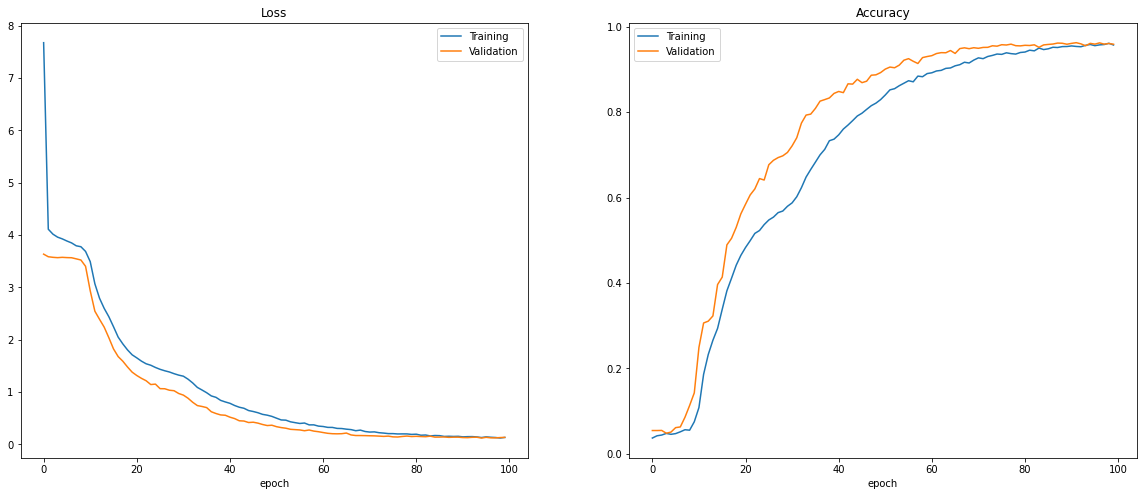

In [15]:
plot_history(history)


In [16]:
evaluate()


Test score: 0.13037943840026855
Test Accuracy: 0.9629453420639038


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

datagen = ImageDataGenerator(width_shift_range=0.1,
                           height_shift_range=0.1,
                           zoom_range=0.2,
                           shear_range=0.1,
                           rotation_range=10.)
datagen.fit(X_train)


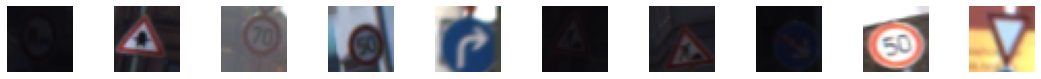

In [18]:
batches = datagen.flow(X_train, y_train, batch_size=10)

X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 10, figsize=(15, 5))
fig.tight_layout()

for i in range(10):
   axs[i].imshow(X_batch[i])
   axs[i].axis("off")


In [19]:
model = modified_model()
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                             steps_per_epoch=len(X_train)/50,
                             epochs=100,
                             validation_data=(X_val, y_val), shuffle=True)


D:\Anaconda\envs\tensorflow-gpu\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
695/695 [==============================] - 10s 14ms/step - loss: 2.7464 - accuracy: 0.2440 - val_loss: 1.8360 - val_accuracy: 0.4667
Epoch 2/100
695/695 [==============================] - 9s 13ms/step - loss: 1.9075 - accuracy: 0.4304 - val_loss: 1.3407 - val_accuracy: 0.5907
Epoch 3/100
695/695 [==============================] - 10s 14ms/step - loss: 1.5673 - accuracy: 0.5143 - val_loss: 1.0661 - val_accuracy: 0.6764
Epoch 4/100
695/695 [==============================] - 10s 14ms/step - loss: 1.3752 - accuracy: 0.5662 - val_loss: 0.9058 - val_accuracy: 0.7320
Epoch 5/100
695/695 [==============================] - 10s 14ms/step - loss: 1.2626 - accuracy: 0.5981 - val_loss: 0.8301 - val_accuracy: 0.7637
Epoch 6/100
695/695 [==============================] - 10s 14ms/step - loss: 1.1728 - accuracy: 0.6262 - val_loss: 0.7459 - val_accuracy: 0.7780
Epoch 7/100
695/695 [==============================] - 9s 14ms/step - loss: 1.1135 - accuracy: 0.6486 - val_loss: 0.7284 - val_accu

In [20]:
def modified_model():
    model = Sequential()
    model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 3), activation='elu'))
    model.add(Conv2D(60, (5, 5), activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(30, (3, 3), activation='elu'))
    model.add(Conv2D(30, (3, 3), activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(30, (3, 3), activation='elu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(500, activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(43, activation='softmax'))
    
    model.compile(Adam(lr=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

m = modified_model()
print(m.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 60)        4560      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 4, 4, 30)         

In [21]:
model = modified_model()
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=50),
                             steps_per_epoch=len(X_train)/50,
                             epochs=100,
                             validation_data=(X_val, y_val), shuffle=True)


Epoch 1/100
695/695 [==============================] - 12s 16ms/step - loss: 2.1487 - accuracy: 0.3681 - val_loss: 0.9290 - val_accuracy: 0.7322
Epoch 2/100
695/695 [==============================] - 11s 15ms/step - loss: 0.8938 - accuracy: 0.7158 - val_loss: 0.3430 - val_accuracy: 0.8966
Epoch 3/100
695/695 [==============================] - 10s 14ms/step - loss: 0.5099 - accuracy: 0.8352 - val_loss: 0.1715 - val_accuracy: 0.9569
Epoch 4/100
695/695 [==============================] - 10s 15ms/step - loss: 0.3688 - accuracy: 0.8843 - val_loss: 0.1420 - val_accuracy: 0.9658
Epoch 5/100
695/695 [==============================] - 10s 15ms/step - loss: 0.2832 - accuracy: 0.9100 - val_loss: 0.1369 - val_accuracy: 0.9615
Epoch 6/100
695/695 [==============================] - 10s 15ms/step - loss: 0.2471 - accuracy: 0.9215 - val_loss: 0.1003 - val_accuracy: 0.9671
Epoch 7/100
695/695 [==============================] - 10s 15ms/step - loss: 0.2113 - accuracy: 0.9334 - val_loss: 0.0909 - val_ac

In [22]:
evaluate()


Test score: 0.10443414747714996
Test Accuracy: 0.9808392524719238


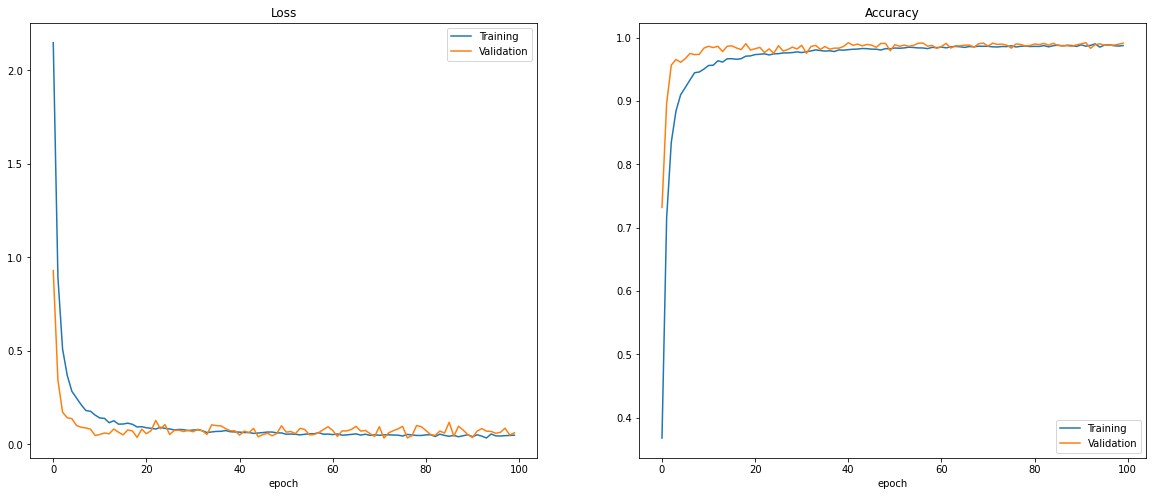

In [23]:
plot_history(history)
